In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
gdp = pd.read_csv(r'data\API_NY.GDP.PCAP.CD_DS2_en_csv_v2_6298251.csv')

In [11]:
all_years = [str(x) for x in range(1960, 2023)]
mt_gdp = gdp[all_years].to_numpy()
nan_count = np.count_nonzero(np.isnan(mt_gdp))
not_nan_count = np.count_nonzero(~np.isnan(mt_gdp))

print(f'nan: {nan_count} \nnot nan: {not_nan_count} \nratio {nan_count/not_nan_count*100:.2f}%')

nan: 3554 
not nan: 13204 
ratio 26.92%


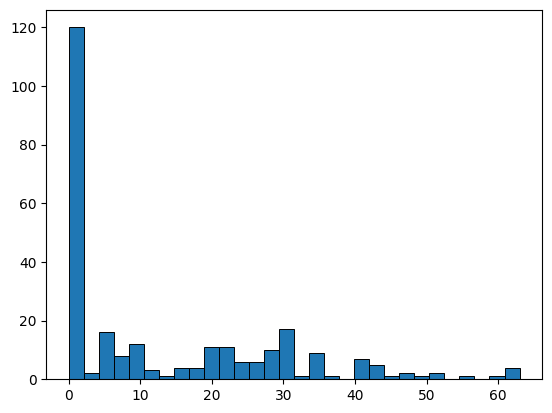

In [12]:
all_years = [str(x) for x in range(1960, 2023)]
# histogram of nan values
nan_dist = np.isnan(mt_gdp).sum(axis=1)


plt.hist(nan_dist,bins=30, edgecolor='black', linewidth=0.7)
plt.title = 'Distribution of miss GDP values'
plt.ylabel = 'Number of Country'
plt.xlabel = 'Count of miss values'
plt.show()


In [13]:
sample = np.log(mt_gdp[~np.isnan(mt_gdp).any(axis=1)])


print(sample)
# Select randomly some of values
import math
miss_ratio = nan_count/not_nan_count
num_element = sample.size
miss_values_index = np.random.randint(0,num_element-1, size=math.floor(miss_ratio*num_element))

nan_sample = sample.copy()

col_count = len(sample[0])
row_count = len(sample)

miss_indexs = []
for j in miss_values_index:
    ii = (j/row_count)
    row_id = int(ii)
    col_id = int(round((ii - row_id)*col_count, 0))
    miss_indexs.append([row_id, col_id])
    nan_sample[row_id, col_id] = np.nan


[[ 4.95149342  4.97218849  5.00243399 ...  7.21215133  7.34317601
   7.40492579]
 [ 4.67333063  4.71964479  4.76911274 ...  7.43134445  7.47700656
   7.48734859]
 [ 7.50141215  7.53774976  7.52544691 ... 10.85646208 11.0136536
  11.08367746]
 ...
 [ 6.2720501   6.29718708  6.32918492 ...  8.65748829  8.86412663
   8.81973648]
 [ 5.43183113  5.37654924  5.34023964 ...  6.86362754  7.03413543
   7.28406725]
 [ 5.62272918  5.63240339  5.62027817 ...  7.22453246  7.4809473
   7.42465531]]


Sum errors 5198.74 with n_neighbors 1
Sum errors 4490.96 with n_neighbors 2
Sum errors 4512.05 with n_neighbors 3
Sum errors 4597.63 with n_neighbors 4
Sum errors 4675.26 with n_neighbors 5
Sum errors 4778.83 with n_neighbors 6
Sum errors 4882.08 with n_neighbors 7
Sum errors 4949.71 with n_neighbors 8
Sum errors 4993.59 with n_neighbors 9
Sum errors 5049.24 with n_neighbors 10
Sum errors 5116.50 with n_neighbors 11
Sum errors 5188.72 with n_neighbors 12
Sum errors 5284.75 with n_neighbors 13
Sum errors 5346.22 with n_neighbors 14
Sum errors 5404.80 with n_neighbors 15


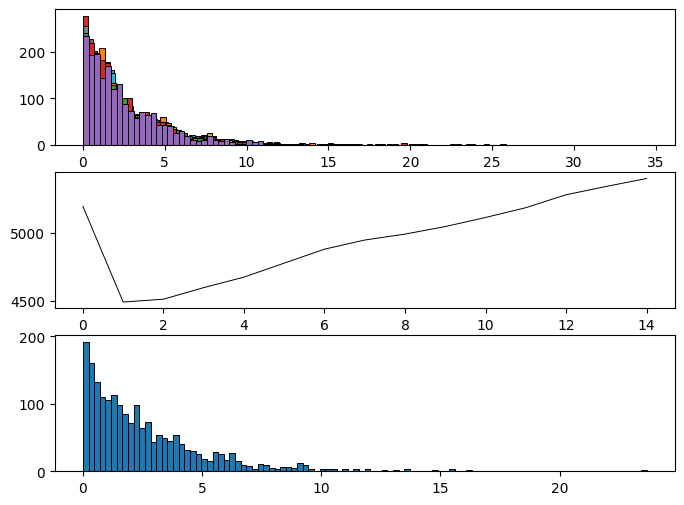

In [14]:
from sklearn.impute import KNNImputer


fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,6))

ns = range(1,16)
sum_errors = []
for n in ns:
    imputer = KNNImputer(n_neighbors=n, weights="distance")
    test_prediction = imputer.fit_transform(nan_sample)

    errors = []
    for k in miss_indexs:
        errors.append(abs(sample[k[0], k[1]] - test_prediction[k[0], k[1]])/sample[k[0], k[1]]*100)

    errors = [item for item in errors if item < 100]
    sum_errors.append(sum(errors))

    print(f"Sum errors {sum(errors):.2f} with n_neighbors {n}")
    ax1.hist(errors, bins=100, edgecolor='black', linewidth=0.7)

ax2.plot(sum_errors,color='black', linewidth=0.7)

min_val = min(sum_errors)
index_min_n = sum_errors.index(min_val)

imputer = KNNImputer(n_neighbors=index_min_n, weights="distance")
test_prediction = imputer.fit_transform(nan_sample)

errors = []
for k in miss_indexs:
    errors.append(abs(sample[k[0], k[1]] - test_prediction[k[0], k[1]])/sample[k[0], k[1]]*100)
ax3.hist(errors, bins=100, edgecolor='black', linewidth=0.7)


plt.show()


In [16]:
gdp_filled_nan_values = np.exp(imputer.fit_transform(np.log(mt_gdp)))
gdp_info = gdp.drop(columns = all_years, axis=1)
gdp_data = pd.DataFrame(gdp_filled_nan_values, columns=all_years)


df_gdp_filled_nan_values = pd.concat([gdp_info, gdp_data], axis=1)

In [18]:
df_gdp_filled_nan_values.to_csv('data/GDP_pcap_filled_miss_values_knn.csv')